In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *


In [18]:
# ----------------------------#
#        LOSS FUNCTIONS 
# ----------------------------#

def mape(y_test, y_pred):
    return np.mean(np.abs((y_pred-y_test)/y_test))

def mspe(y_test, y_pred):
    return np.mean(np.square((y_pred-y_test)/y_test))

def mae(y_test, y_pred):
    return np.mean(np.abs(y_test - y_pred))


In [43]:
#Number of infected for past two weeks
X = pd.read_csv('data.csv').iloc[:,1:-2].values

#Number of recovered
y_recovered = pd.read_csv('data.csv').iloc[:,-3].values

#Number of deaths
y_deaths = pd.read_csv('data.csv').iloc[:,-2].values

#Number of recovered with transformation to smooth data
y_smoothed = pd.read_csv('data.csv').iloc[:,-1].values

pct_90 = int(np.ceil(90*len(X)/100))
pct_80 = int(np.ceil(80*len(X)/100))
pct_70 = int(np.ceil(70*len(X)/100))
pct_50 = int(np.ceil(50*len(X)/100))
pct_40 = int(np.ceil(40*len(X)/100))

pct = pct_50

X_train, X_test = X[:pct], X[pct:]
y_train, y_test =y_recovered[:pct], y_recovered[pct:]

In [44]:
def baseline_model_k(X_train, y_train, X_test, y_test, k):
    """k is such that y_pred[i] = y_train[i-k]"""
    y_acc = list(y_train)
    y_pred = []
    
    for i in range(len(y_test)):
        y_pred.append(y_acc[-k])
        y_acc.append(y_acc[-k])
        
    #y_pred = y_train[-k:-k-len(y_test):-1]
    return y_acc, y_pred


In [45]:


def plot_baseline(k):
    y_pred_full = baseline_model_k(X_train, y_train, X_test, y_test,k)[0]
    plt.plot(y_pred_full, 'g', y_recovered, 'b')
    plt.xlabel('Day')
    plt.ylabel('Number of Daily Recovered')
    plt.legend(['Predicted value','True value'])
    plt.title('Baseline Prediction model for k=' + str(k))
    plt.axvline(x=pct-1)

def baseline_error(k):
    y_pred = baseline_model_k(X_train, y_train, X_test, y_test, k)[1]
    loss = mape(y_test, y_pred)
    return loss

def find_optimum_k():    
    K = 30
    maes = {}
    mapes = {}
    for k in range(1,K):
        y_pred = baseline_model_k(X_train, y_train, X_test, y_test, k)[1]
        mapes[k] = baseline_error(k)
        maes[k] = mae(y_test, y_pred) 
    return maes, sorted(maes, key=maes.get), mapes, sorted(mapes, key=mapes.get)


In [46]:
y_pred = baseline_model_k(X_train, y_train, X_test, y_test, 5)[1]

In [47]:
mae(y_pred, y_test)

1148.361111111111

In [48]:
f = find_optimum_k()

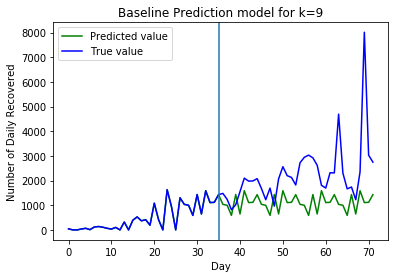

In [51]:
plot_baseline(9)